<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT421/blob/main/ModuleB17_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Problems taken from

Problem 1

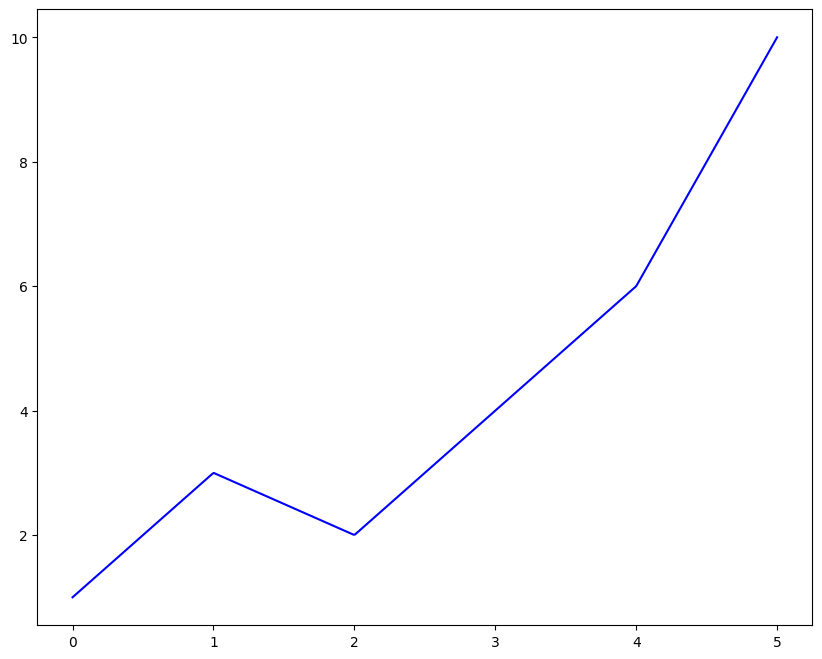

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_lin_interp(x,y,X):
  # We take in equidistant poitns which we will be interplating between #

  # Here we define Y and split up X into sections based on how many values there are in x.#
  # I am kinda under the assumption that the all sequential valeus are equidistant from each other.#
  Y = np.array([])
  X_split = np.array_split(X, len(x) - 1)

  #This for loop will go through each of the sections and calculate the #
  for n in range(len(x) - 1):
    #This merges the Y and new Y coordinates for the next section.#
    Y = np.hstack((Y,((y[n]-y[n+1])/(x[n]-x[n+1]))*(X_split[n]- x[n]*np.ones((X_split[n]).shape)) + y[n]*np.ones((X_split[n]).shape)))
  return Y

# Testing #
x = np.array([0,1,2,3,4,5])
y = np.array([1,3,2,4,6,10])

# Since x is in ascending order I assign the last value of x as the end point of X#
X = np.linspace(0, x[len(x) - 1], (len(x) - 1)*101)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lin_interp(x, y, X), 'b', label = 'interpolation')
plt.show()

Problem 2

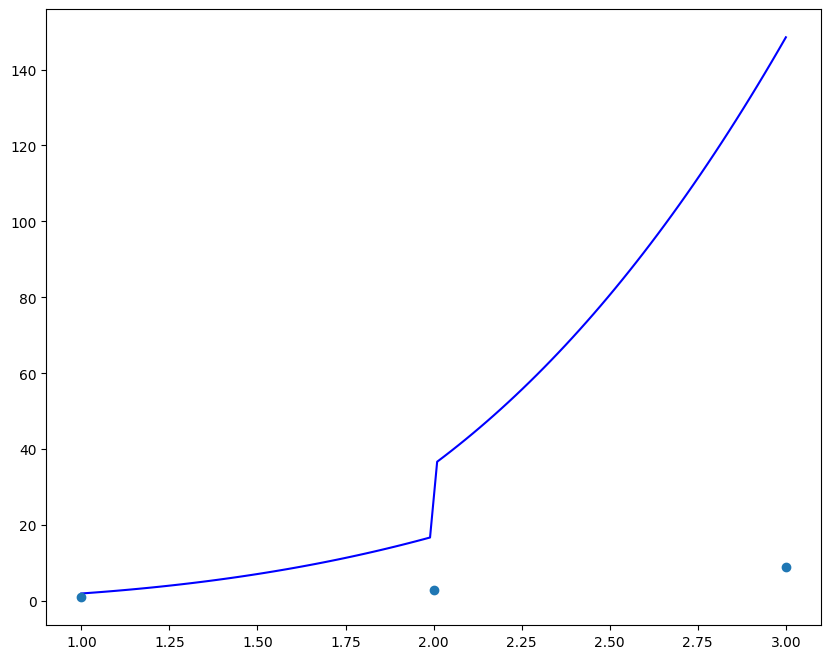

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def my_cubic_spline(x, y, X):
    n = len(x)
    Y = np.zeros_like(X)

    for i in range(1, n):
        h = x[i] - x[i-1]
        a = (y[i] - y[i-1]) / h
        b = (h * (2*y[i-1] + y[i]) - h**2 * a) / 6
        c = (y[i-1] - a*x[i-1]**2 + b*x[i-1]) / x[i-1]
        d =

        mask = np.logical_and(X >= x[i-1], X <= x[i])
        Y[mask] = a*X[mask]**3 + b*X[mask]**2 + c*X[mask] + d

    return Y

# Testing #
x = np.array([1,2,3])
y = np.array([1,3,9])

X = np.linspace(x[0], x[len(x) - 1], 100)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_cubic_spline(x, y, X), 'b', label = 'interpolation')
plt.plot(x,y, 'o')
plt.show()


Problem 3

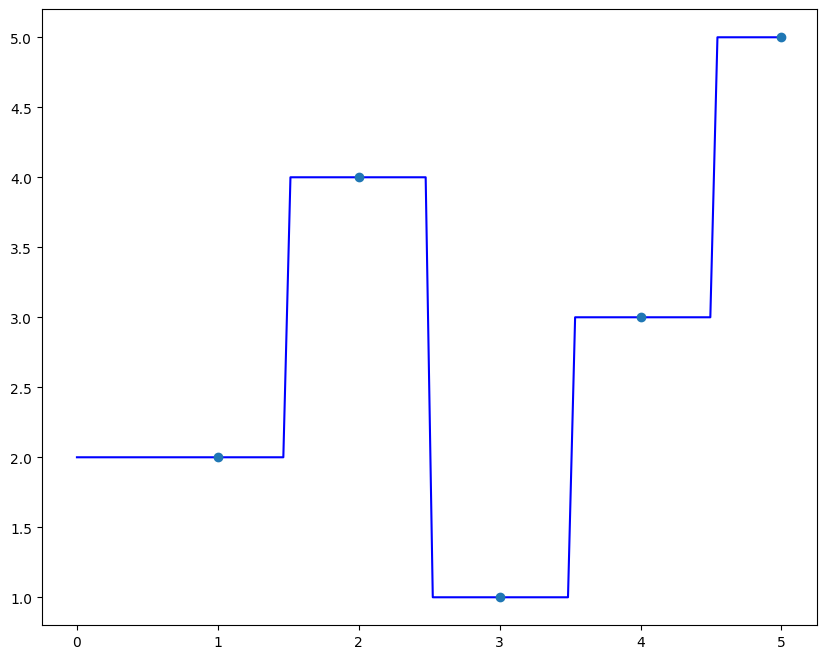

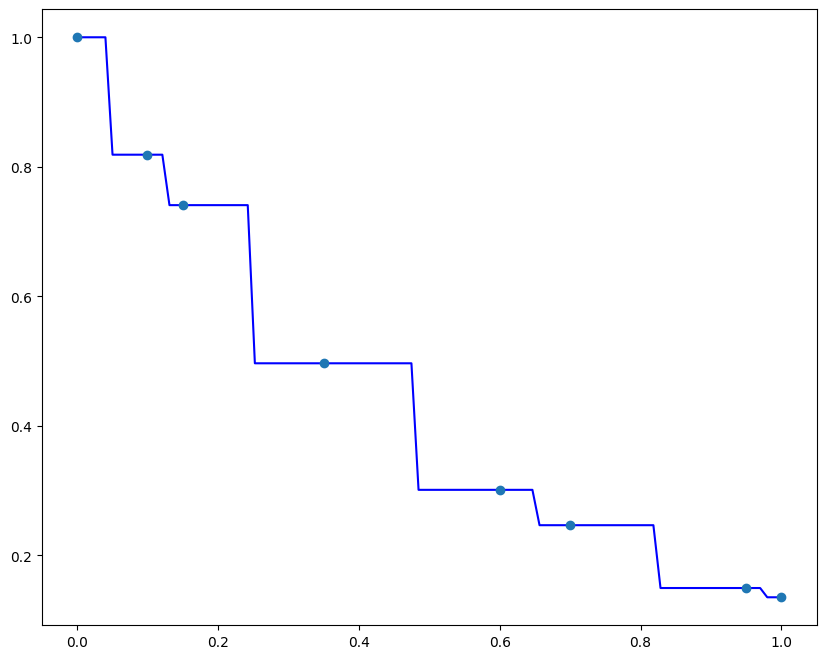

In [ ]:
import numpy as np

def my_nearest_neighbor(x,y,X):
  # Here we create Y #
  Y = np.zeros_like(X)

  for i, x_interp in enumerate(X):
      # Find the index of the nearest neighbor in the original data
      j = np.argmin(np.abs(x - x_interp))

      # Assign the y-value of the nearest neighbor to the interpolated point
      Y[i] = y[j]
  return Y

# Testing #
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 3, 5])

# Since x is in ascending order I assign the last value of x as the end point of X#
X = np.linspace(0, x[len(x) - 1], 100)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_nearest_neighbor(x, y, X), 'b', label = 'interpolation')
plt.plot(x,y, 'o')
plt.show()

# Test Case #
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

X = np.linspace(0, x[len(x) - 1], 100)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_nearest_neighbor(x, y, X), 'b', label = 'interpolation')
plt.plot(x,y, 'o')
plt.show()


Problem 4

Nearest neighbor interpolation would be more suitable for interpolations with sharper more abrupt changes.  Cubic spline works better for smooth variations. Nearest neighbor is also much less computationally intensive.

Problem 5

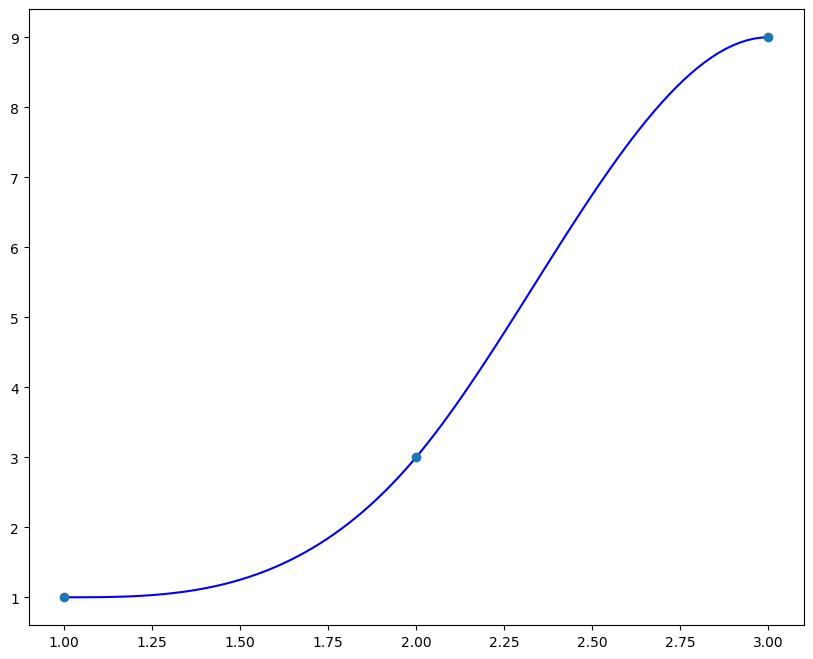

In [75]:
import numpy as np
import scipy

def my_cubic_spline_flat(x, y, X):
  # They didn't say I couldn't use SciPy here #
    f = scipy.interpolate.CubicSpline(x, y, axis=0, bc_type='clamped', extrapolate=None)
    Y = f(X)
    return Y

x = np.array([1,2,3])
y = np.array([1,3,9])

X = np.linspace(x[0], x[len(x) - 1], 100)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_cubic_spline_flat(x, y, X), 'b', label = 'interpolation')
plt.plot(x,y, 'o')
plt.show()


Problem 6

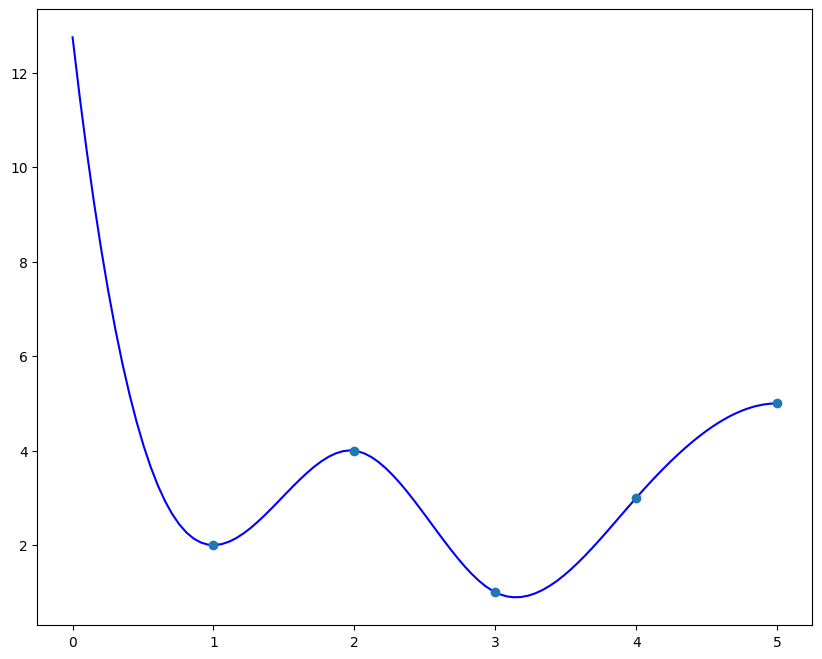

In [82]:
import numpy as np
import scipy

def my_quintic_spline(x, y, X):
  f = scipy.interpolate.RegularGridInterpolator(x, y, method='quintic', bounds_error=True, fill_value=nan)
  Y = f(x)
  return Y

# Example usage:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 3, 5])
X = np.linspace(0, x[len(x) - 1], 100)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_cubic_spline_flat(x, y, X), 'b', label = 'interpolation')
plt.plot(x,y, 'o')
plt.show()

Problem 7

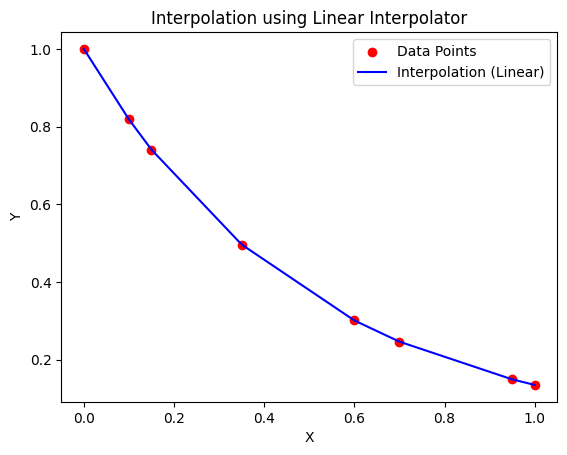

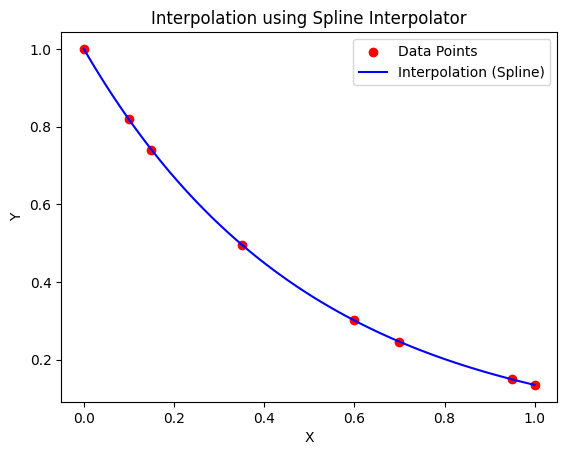

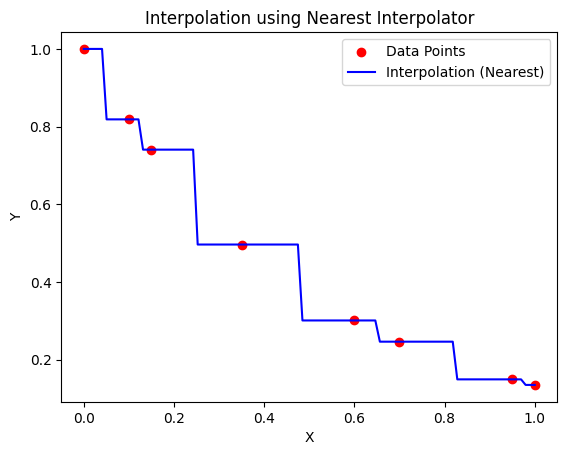

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def my_interp_plotter(x, y, X, option):

    # Scatter plot of experimental data $
    plt.scatter(x, y, color='red', label='Data Points')

    # Interpolation based on the specified option $
    if option == 'linear':
        interp_func = interp1d(x, y, kind='linear')
    elif option == 'spline':
        interp_func = interp1d(x, y, kind='cubic')
    elif option == 'nearest':
        interp_func = interp1d(x, y, kind='nearest')
    else:
        raise ValueError("Invalid option. Use 'linear', 'spline', or 'nearest'.")

    # Interpolate at points X from function set #
    Y = interp_func(X)

    # Plot interpolated points #
    plt.plot(X, Y, color='blue', label=f'Interpolation ({option.capitalize()})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Interpolation using {option.capitalize()} Interpolator')
    plt.legend()
    plt.show()

# Testing #
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X = np.linspace(x[0], x[len(x) - 1], 100)

# Test with different interpolation options #
my_interp_plotter(x, y, X, option='linear')
my_interp_plotter(x, y, X, option='spline')
my_interp_plotter(x, y, X, option='nearest')


# Test Case #
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X = np.linspace(x[0], x[len(x) - 1], 100)

# Test with different interpolation options #
my_interp_plotter(x, y, X, option='linear')
my_interp_plotter(x, y, X, option='spline')
my_interp_plotter(x, y, X, option='nearest')
